# Visualize Result of PHILHARMONIC Analysis

Lorem ipsum dolor...

In [11]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from loguru import logger
from matplotlib import pyplot as plt

from philharmonic.utils import (
    load_cluster_json,
    parse_GO_database,
    parse_GO_map,
    plot_cluster,
    print_cluster,
)

In [166]:
# Initial Files
cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.json"
network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_network.positive.tsv"
go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_GO_map.csv"

GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/go.obo"

from pathlib import Path
IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/pdam")

# # Initial Files
# cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_clusters.json"
# network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_network.positive.tsv"
# go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/20240926_cgoreaui_GO_map.csv"

# GO_DATABASE = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/c_goreaui/20240926_philharmonic_v0.5.0_cgoreaui/go.obo"

# from pathlib import Path
# IMG_DIR = Path("/mnt/home/ssledzieski/Projects/philharmonic-experiments/img/cgor")

In [167]:
clusters = load_cluster_json(cluster_file_path)
full_G = nx.read_weighted_edgelist(network_file_path)
go_map = parse_GO_map(go_map_path)
go_database = parse_GO_database(GO_DATABASE)

---

## Basic Network Statistics

In [168]:
label = ["Nodes", "Edges", "Degree (Med)", "Degree (Avg)", "Sparsity"]
degrees = [i[1] for i in list(full_G.degree())]
value = [
    len(full_G.nodes),
    len(full_G.edges),
    np.median(degrees),
    np.mean(degrees),
    len(full_G.edges()) / len(full_G) ** 2,
]
df = pd.DataFrame([label, value]).T
df.columns = ["", "Network"]
df = df.set_index("")
df

,Network
,
Nodes,7267
Edges,348278
Degree (Med),37.0
Degree (Avg),95.851933
Sparsity,0.006595


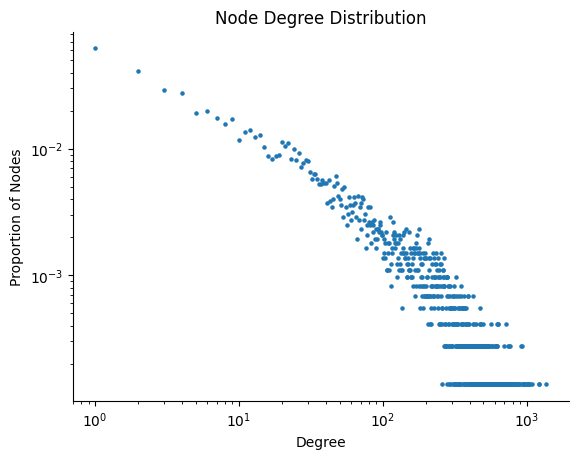

In [169]:
degreeDist = {}
for i in degrees:
    n = degreeDist.setdefault(i, 0)
    degreeDist[i] = n + 1

plt.scatter(degreeDist.keys(), [i / len(full_G) for i in degreeDist.values()], s=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Proportion of Nodes")
plt.title("Node Degree Distribution")
plt.savefig(IMG_DIR / "degree_distribution.svg", bbox_inches="tight", dpi=300)
sns.despine()

---

## Basic Cluster Statistics

In [170]:
logger.info(f"Number of clusters: {len(clusters)}")

2024-10-04 14:38:37.925 | INFO     | __main__:<module>:1 - Number of clusters: 468


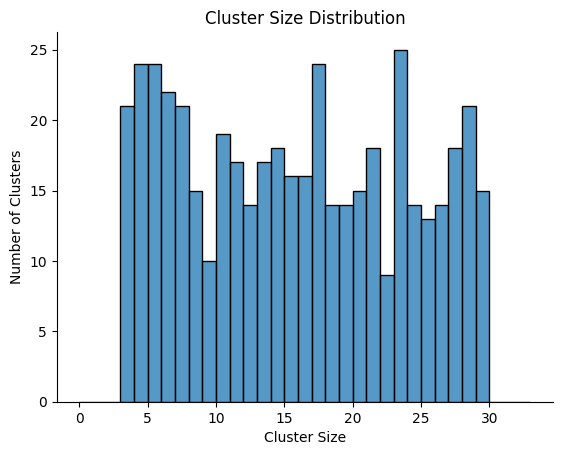

In [171]:
sizes = [len(i["members"]) for i in clusters.values()]
sns.histplot(sizes, bins=np.arange(0, max(sizes) + 5, max(sizes) // 20))
plt.xlabel("Cluster Size")
plt.ylabel("Number of Clusters")
plt.title("Cluster Size Distribution")
sns.despine()
plt.savefig(IMG_DIR / "size_distribution.svg", bbox_inches="tight", dpi=300)
plt.show()

---

## View Individual Clusters

In [172]:
i = 150
k = list(clusters.keys())[i]
# k = "208641124039621440"

In [173]:
print_cluster(clusters[k], go_database, 10)

Cluster of 20 proteins [pdam_00013683-RA, pdam_00006515-RA, pdam_00000216-RA, ...] (hash 208641124039621440)
20 proteins re-added by ReCIPE (degree, 0.75)
Edges: 3
Triangles: 0
Max Degree: 2
Top Terms:
		GO:0019233 - <sensory perception of pain> (20)
		GO:0048148 - <behavioral response to cocaine> (19)
		GO:0006468 - <protein phosphorylation> (19)
		GO:0007507 - <heart development> (19)
		GO:0010759 - <positive regulation of macrophage chemotaxis> (19)
		GO:0001963 - <synaptic transmission, dopaminergic> (19)
		GO:0071380 - <cellular response to prostaglandin E stimulus> (19)
		GO:0071502 - <cellular response to temperature stimulus> (19)
		GO:0008542 - <visual learning> (19)
		GO:0007601 - <visual perception> (19)



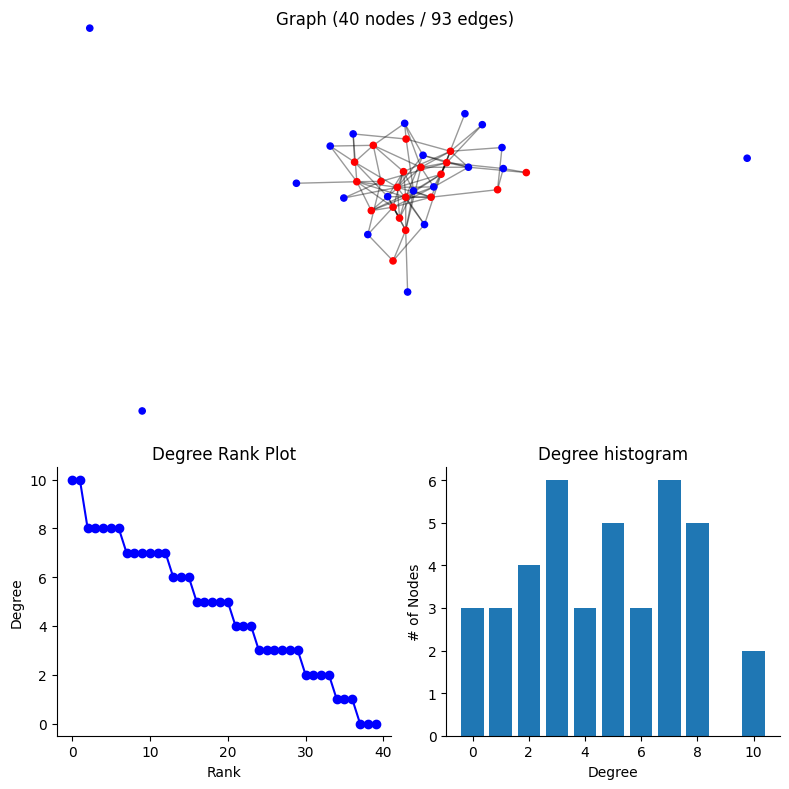

In [174]:
# plot_cluster(
#     clusters[k], full_G, use_recipe=True, savefig="../img/readme_sample_cluster.jpg"
# )
plot_cluster(
    clusters[k], full_G, use_recipe=True, savefig=None
)